# Packages

In [2]:
from xai_func import expand_selected_features
from ASV_dl_func import *
from xai_func import scale_data, signal_segmentation, perturb_segments, plot_cqcc_perturbations, train_gridsearch, perturb_random_features_mean
from matplotlib import pyplot as plt
from tets_xai import extract_top_intervals_global, compare_gmm_bilstm, plot_heatmaps_separately_stylish

In [3]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# Load dataset

In [4]:
X_train = pd.read_csv("csvki/asv2019_inthewild_dataset.csv")

In [10]:
X_test = pd.read_csv("csvki/test_asv2016_data.csv")

# Features

In [5]:
feature_extractors_map = {
    'cqcc': extract_cqcc,
    #'gtcc': extract_gtcc, 
    # 'mel-spect': extract_mel_spectrogram,
    # 'mfcc': extract_mfcc,
    # 'lfcc': extract_lfcc,
    # 'wpt': extract_wpt,
    # 'Formants': analyze_formants_and_silence
}

In [6]:
col_name = feature_extractors_map.keys()

# GridSearchCV + SVM
## Extract features

In [7]:
X_train = extract_features(X_train, feature_extractors_map, mean=True) 
X_train = X_train.dropna()

   - Ekstrahuję: cqcc


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 1032 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 1932 tasks      | elapsed:   60.0s
[Parallel(n_jobs=-1)]: Done 2944 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 6160 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 7010 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 7960 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 9010 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 10126 out of 10126 | elapsed:  4.2min finished


In [8]:
X_train

Unnamed: 0                                           filepath  \
0            1735  I:\Downloads\ASVspoof2021_LA_eval\flac\LA_E_40...   
1            2654  C:\Users\izaol\Downloads\archive (1)\release_i...   
2            1229  C:\Users\izaol\Downloads\archive (1)\release_i...   
3             929  I:\Downloads\ASVspoof2021_LA_eval\flac\LA_E_69...   
4            3982  C:\Users\izaol\Downloads\archive (1)\release_i...   
...           ...                                                ...   
10121        4990  C:\Users\izaol\Downloads\archive (1)\release_i...   
10122        4991  C:\Users\izaol\Downloads\archive (1)\release_i...   
10123        4994  C:\Users\izaol\Downloads\archive (1)\release_i...   
10124        4996  C:\Users\izaol\Downloads\archive (1)\release_i...   
10125        4998  C:\Users\izaol\Downloads\archive (1)\release_i...   

       chunk_index  chunk_start  chunk_end  label  \
0                0          0.0        2.0      0   
1                0          0.0        2.0      0   
2                2          4.0        6.0      0   
3                0          0.0        2.0      0   
4                6         12.0       14.0      0   
...            ...          ...        ...    ...   
10121            2          4.0        6.0      1   
10122            1          2.0        4.0      1   
10123            1          2.0        4.0      1   
10124            0          0.0        2.0      1   
10125            1          2.0        4.0      1   

                                                    cqcc  
0      [75.91489, -1.3774531, -0.52186656, -0.7669763...  
1      [70.73506, -2.3485584, -0.40560088, -0.6650184...  
2      [70.2168, -3.3604922, -0.51611954, -0.44909114...  
3      [75.70539, -1.3663313, -0.5255071, -0.4945092,...  
4      [67.65949, -3.0724354, -0.91910535, -0.7856827...  
...                                                  ...  
10121  [73.396126, -3.6024477, -1.5462404, -1.2969004...  
10122  [74.01174, -2.6930573, -0.8359369, -0.5772506,...  
10123  [72.32041, -2.6939716, -1.2157722, -0.19441637...  
10124  [71.30978, -3.3631873, -0.95679075, -1.2143464...  
10125  [71.32502, -3.418109, 0.48265192, -0.2679558, ...  

[7861 rows x 7 columns]

In [14]:
X_test = extract_features(X_test, feature_extractors_map, mean=True) 
X_test = X_test.dropna()

mean  True
   - Ekstrahuję: cqcc


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 1344 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 1794 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s


   - Ekstrahuję: gtcc


[Parallel(n_jobs=-1)]: Done 1845 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    2.6s finished


   - Ekstrahuję: mfcc


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1874 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    3.3s finished


## Expand_selected_features

In [15]:
train_df = expand_selected_features(X_train.copy(), ['gtcc', 'mfcc', 'cqcc'])
test_df = expand_selected_features(X_test.copy(), ['gtcc', 'mfcc', 'cqcc'])

Rozdzielono kolumnę 'gtcc' na 198 podkolumn.
Rozdzielono kolumnę 'mfcc' na 13 podkolumn.
Rozdzielono kolumnę 'cqcc' na 19 podkolumn.
Rozdzielono kolumnę 'gtcc' na 198 podkolumn.
Rozdzielono kolumnę 'mfcc' na 13 podkolumn.
Rozdzielono kolumnę 'cqcc' na 19 podkolumn.


## Standard Scaler

In [16]:
col_name = train_df.columns.drop(['Unnamed: 0', 'filepath', 'chunk_index', 'chunk_start', 'chunk_end',
       'label'])

In [17]:
scaler, df_scale = scale_data(df_train=train_df, df_test=test_df, col_name=col_name)

## XAI - LIME

### Tabular data

In [18]:
X = train_df[col_name].values 
y = train_df['label'].values

In [19]:
explainer = LimeTabularExplainer(
    training_data=X,
    training_labels=y,
    feature_names=col_name,
    class_names=[0, 1],
    mode='classification',
    random_state=101
)

In [20]:
grid = train_gridsearch(X, y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [21]:
j = 5
exp = explainer.explain_instance(
    test_df.iloc[j][col_name],
    grid.predict_proba,  
    num_features=10
)

C:\Users\izaol\AudioSpoofing\venv\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\izaol\AudioSpoofing\venv\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\izaol\AudioSpoofing\venv\lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To a

In [22]:
test_df.iloc[j]['label']

1

In [23]:
exp.show_in_notebook(show_table=True)

In [33]:
exp.save_to_file('explanation.html')

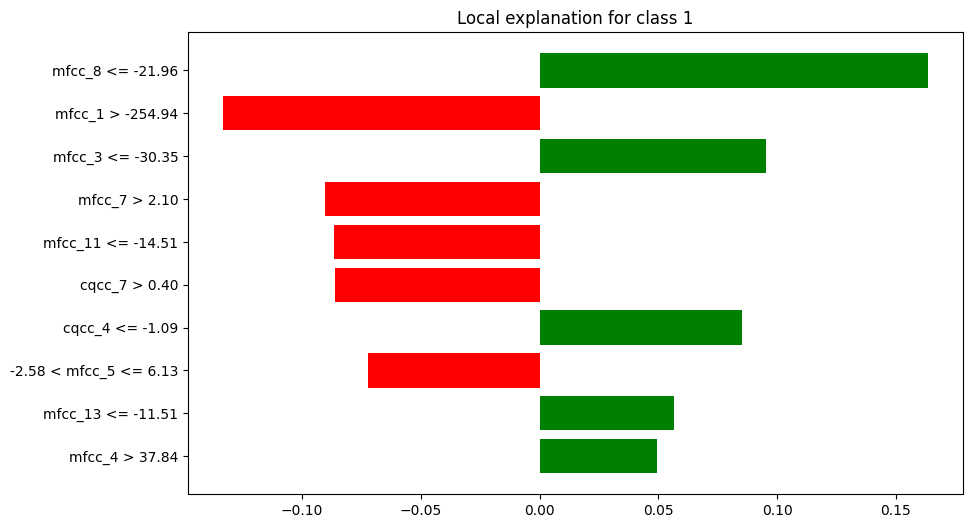

In [35]:
fig = exp.as_pyplot_figure()
fig.set_size_inches(10, 6)
plt.show()

# Prepare LIME for Time Series

In [36]:
X_sample = X_train.sample(100)

In [37]:
X_sample = extract_features(X_sample, {"cqcc": extract_cqcc})

mean  False
   - Ekstrahuję: cqcc


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.0s finished


In [38]:
signal = X_sample['cqcc'].iloc[0]

In [39]:
signal.shape

(19, 63)

## Slice data into smaller parts

In [40]:
parts, remainder = signal_segmentation(signal)

## Show segmentation

### Important parts in time

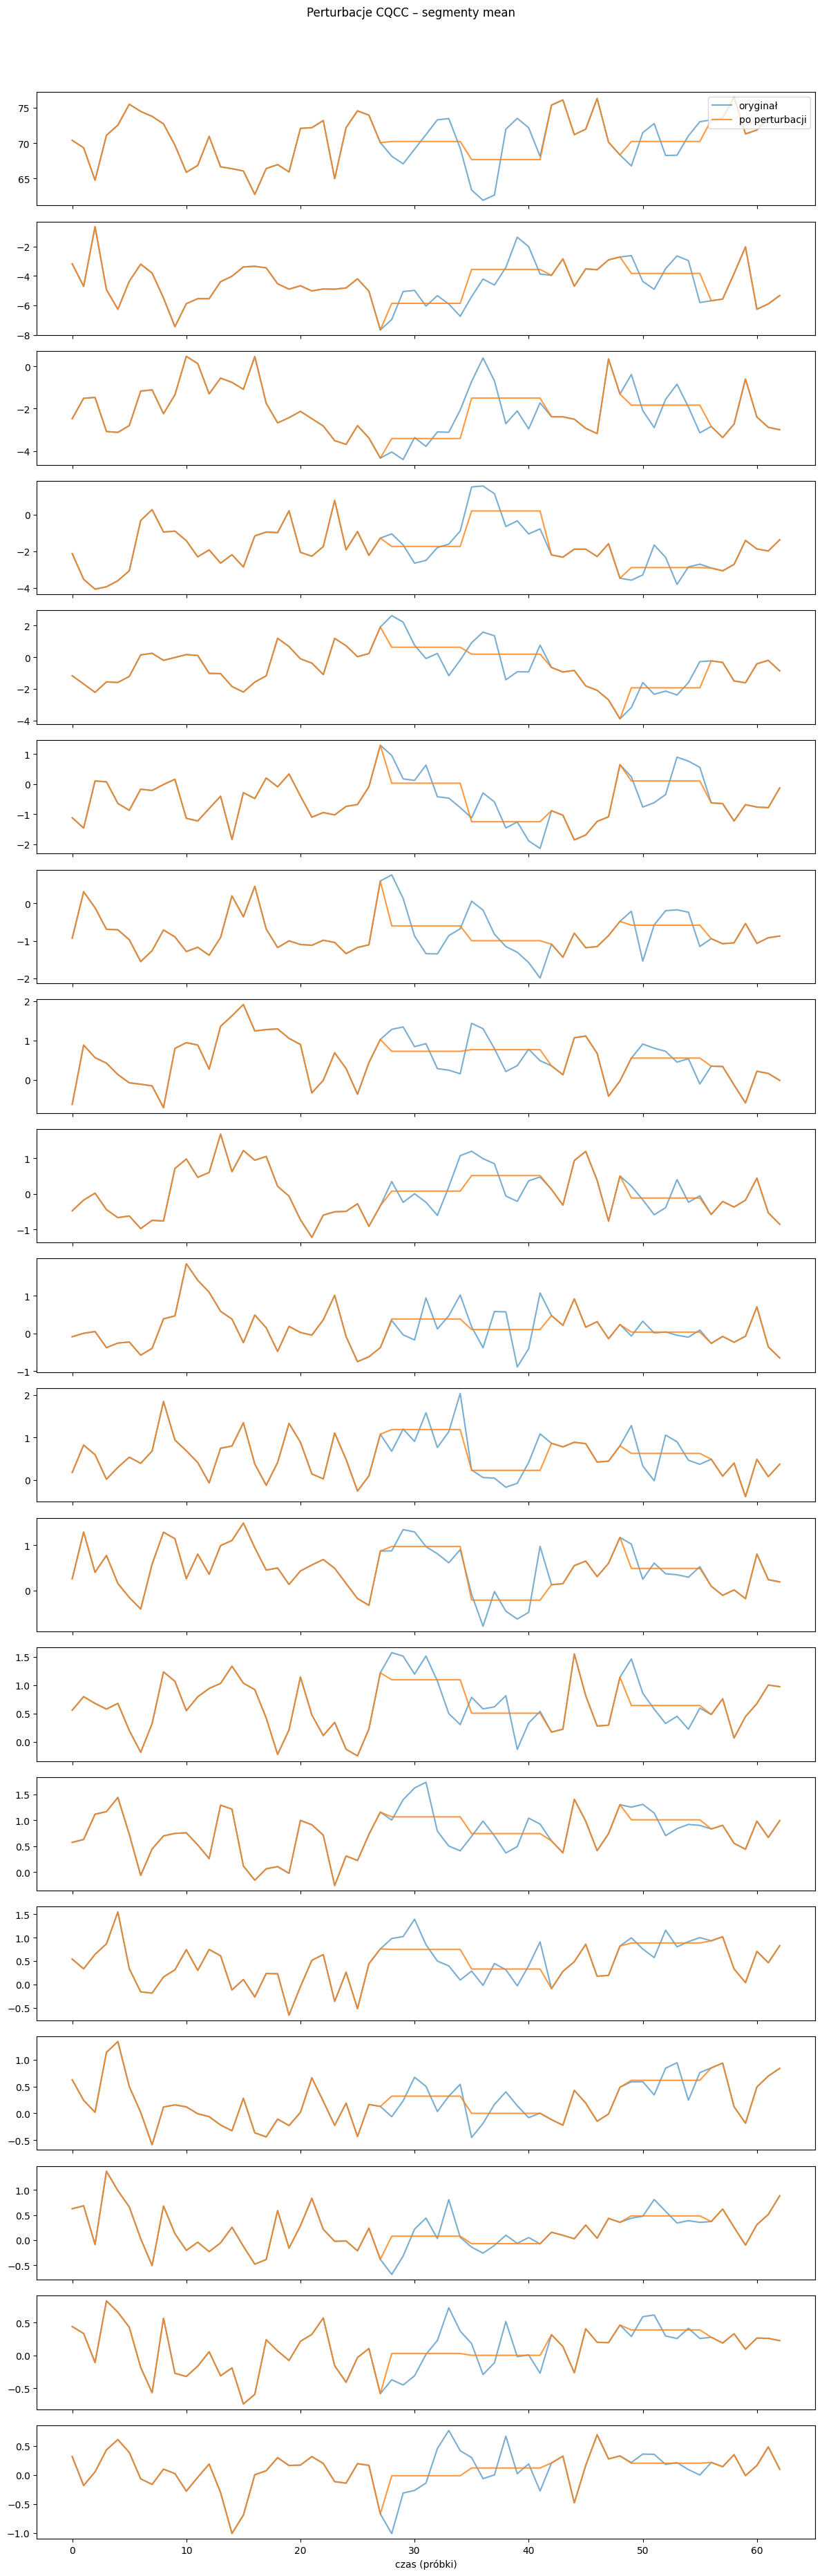

In [43]:
perturbed_data, active_vec = perturb_segments(signal, num_slices=9, axis=1, prob_active=0.45)
plot_cqcc_perturbations(signal, perturbed_data, active_vec.astype(float), title="Perturbacje CQCC – segmenty mean")

### important features

Uśrednione cechy: [11]


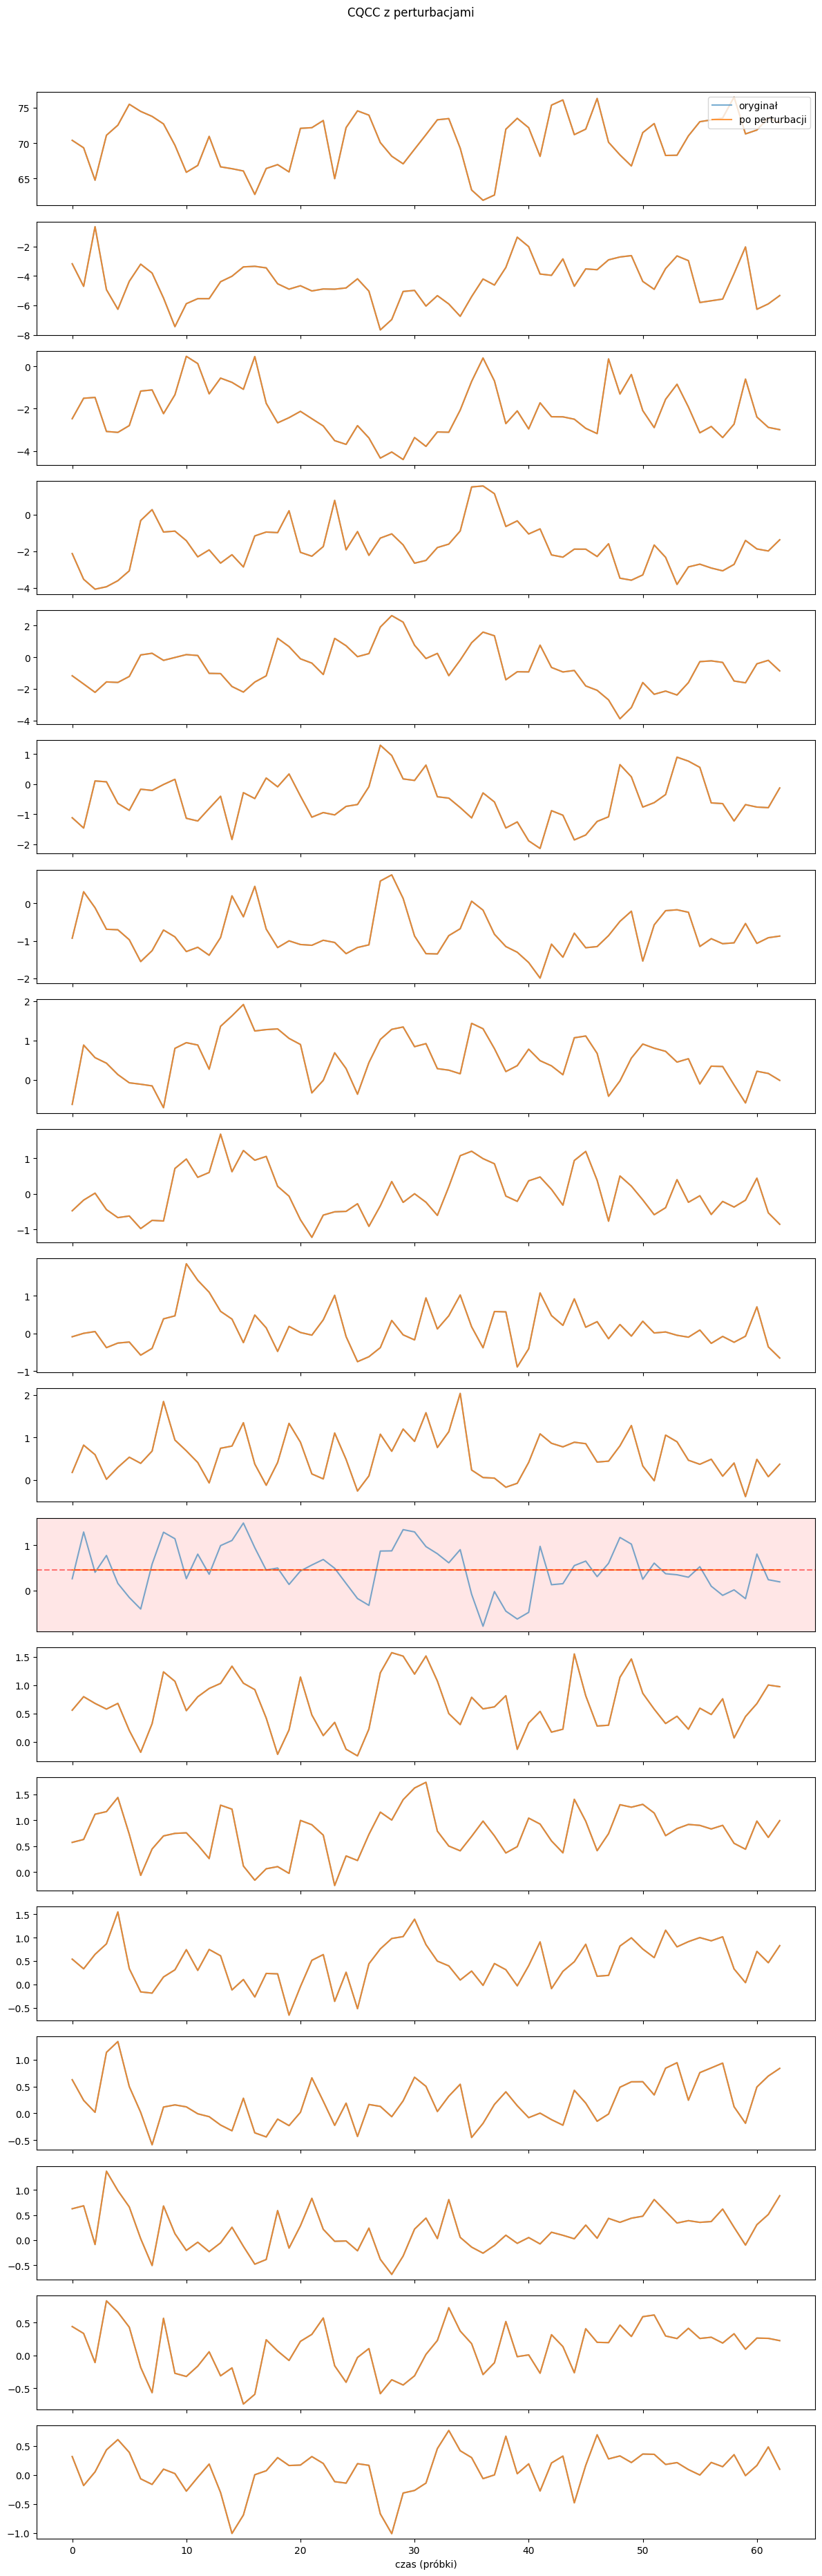

In [44]:
perturbed_data, chosen_feats = perturb_random_features_mean(signal, min_feats=1, max_feats=3)
plot_cqcc_perturbations(signal, perturbed_data, scales=chosen_feats, time=False)

Load data

In [45]:
from xai_func import prepare_pertubation_data_GMM_BiLSTM
X_test = pd.read_csv("csvki/test_asv2016_data.csv")
X_test = extract_features(X_test, {'cqcc': extract_cqcc}, mean=False) 
X_test = X_test.dropna()

mean  False
   - Ekstrahuję: cqcc


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   23.8s finished


Prepare data

In [46]:
result = prepare_pertubation_data_GMM_BiLSTM(X_test.copy(), {"cqcc": extract_cqcc}, num_slices=7)

mean  False
   - Ekstrahuję: cqcc


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 1124 out of 1139 | elapsed:   16.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1139 out of 1139 | elapsed:   16.3s finished


Model BiLSTM wczytany z 'GMM-BiLSTM\bilstm_model.pt'
Wczytywanie zapisanych modeli GMM...
Modele GMM pomyślnie wczytane.


In [47]:
signal_original = X_test.loc[9, "cqcc"] 
perturbed_info = result["perturbed_info"]

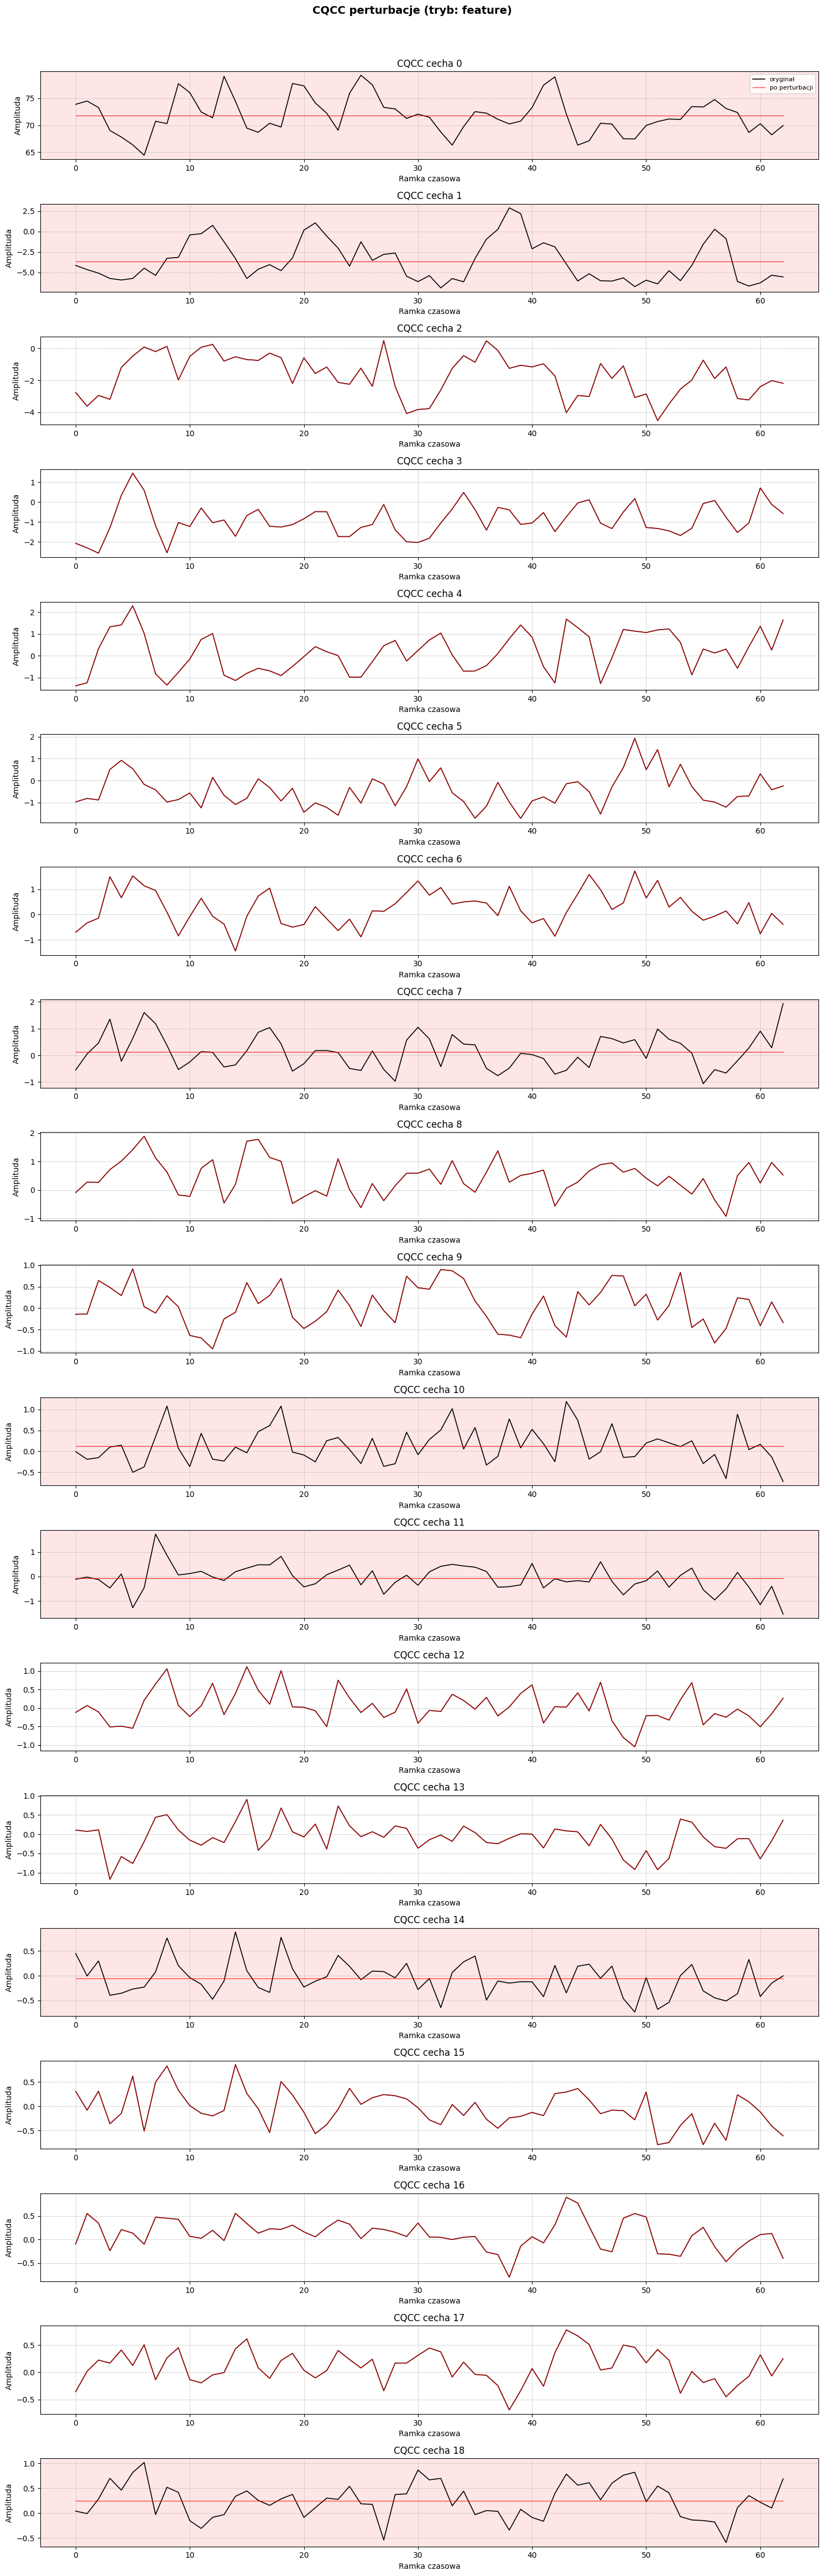

In [49]:
visualize_cqcc_perturbation_colored(signal_original, perturbed_info, index=9)

In [50]:
result2 = prepare_pertubation_data_GMM_BiLSTM(X_test.copy(), {"cqcc": extract_cqcc}, num_slices=9, perturb_mode="time")

mean  False
   - Ekstrahuję: cqcc


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 1124 out of 1139 | elapsed:   15.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1139 out of 1139 | elapsed:   15.4s finished


Model BiLSTM wczytany z 'GMM-BiLSTM\bilstm_model.pt'
Wczytywanie zapisanych modeli GMM...
Modele GMM pomyślnie wczytane.


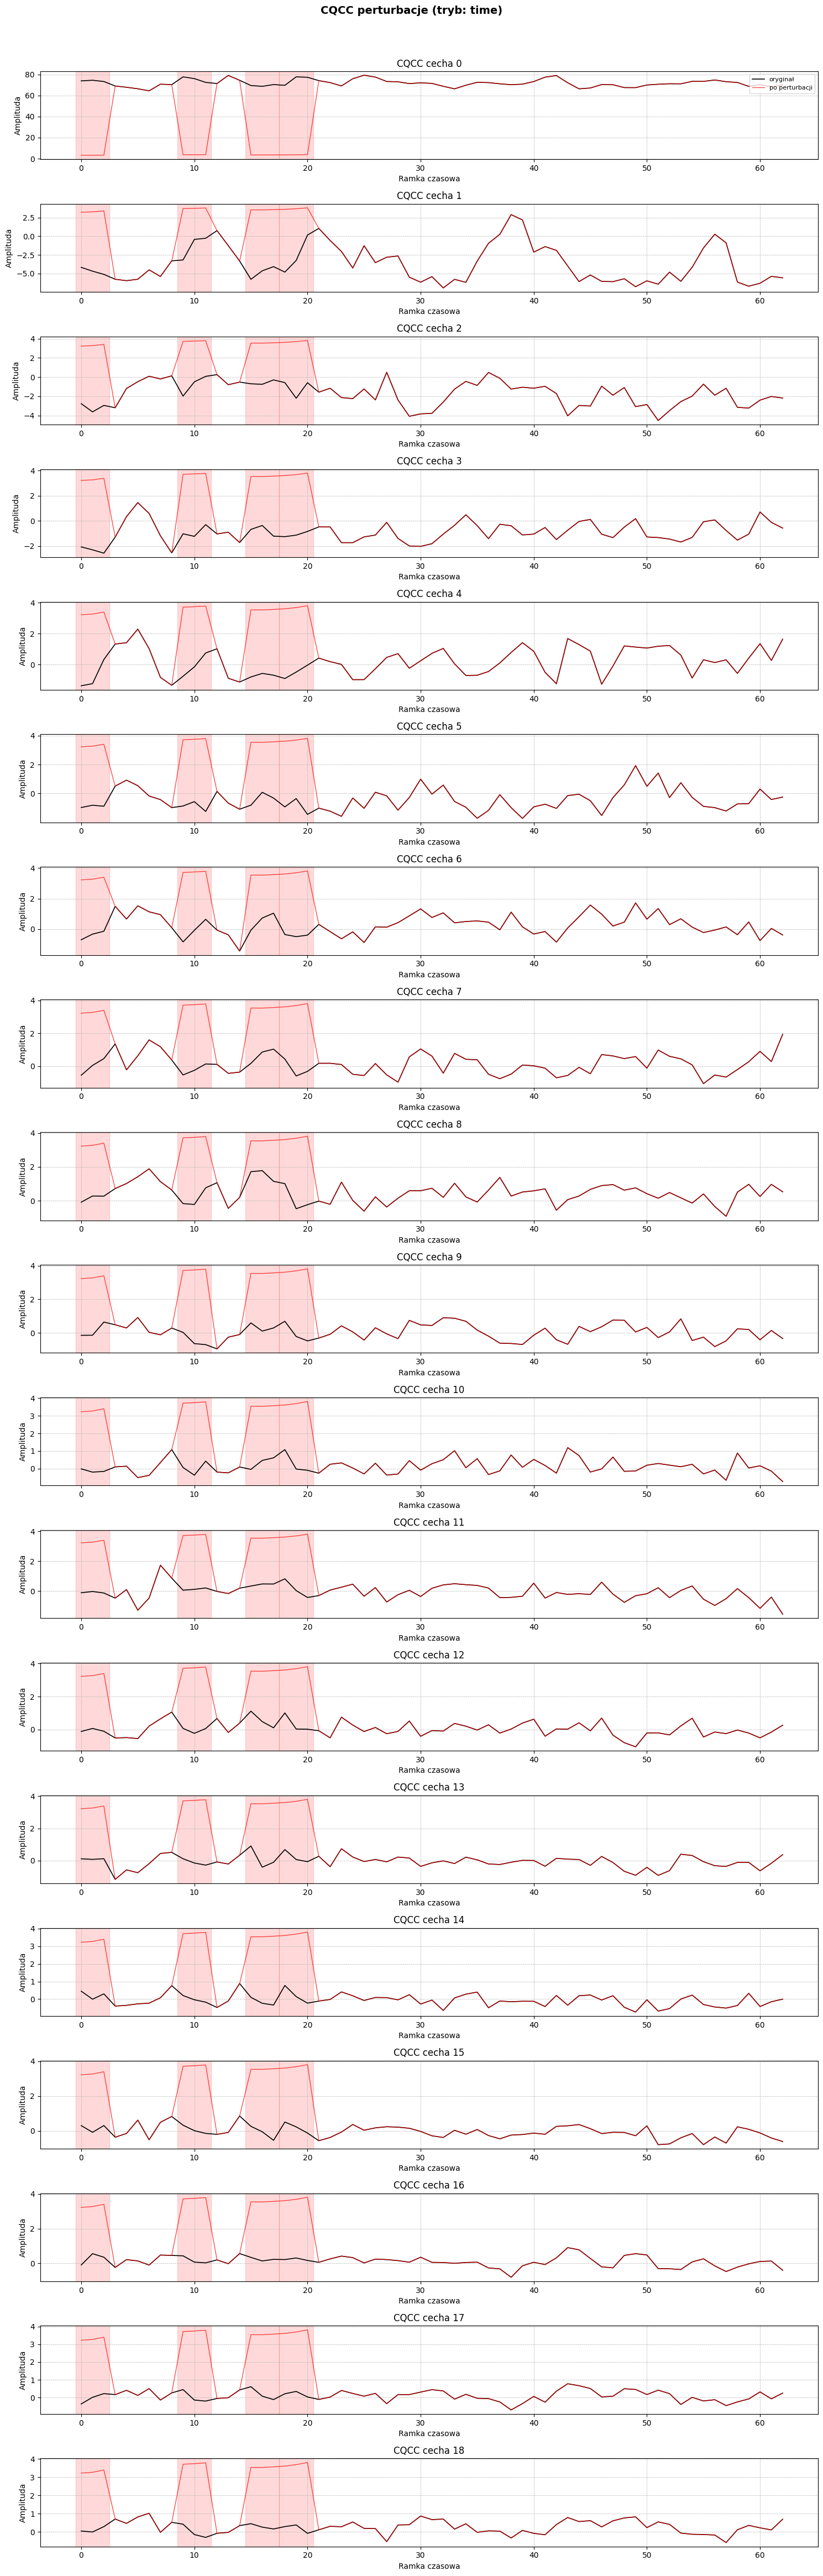

In [52]:
signal_original2 = X_test.loc[9, "cqcc"]
perturbed_info2 = result2["perturbed_info"]
visualize_cqcc_perturbation_colored(signal_original2, perturbed_info2, index=9, )

In [155]:
from xai_func import test_lime_on_single_instance

res = test_lime_on_single_instance(signal_original, perturb_mode="feature", n_perturbations=20)

Model BiLSTM wczytany z 'GMM-BiLSTM\bilstm_model.pt'
Wczytywanie zapisanych modeli GMM...
Modele GMM pomyślnie wczytane.


In [76]:
from xai_func import test_lime_on_single_instance

res2 = test_lime_on_single_instance(signal_original, perturb_mode="time", n_perturbations=20)

Model BiLSTM wczytany z 'GMM-BiLSTM\bilstm_model.pt'
Wczytywanie zapisanych modeli GMM...
Modele GMM pomyślnie wczytane.


mean  False
   - Ekstrahuję: cqcc


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  2.1min finished


Wczytywanie zapisanych modeli GMM...
Modele GMM pomyślnie wczytane.
Model BiLSTM wczytany z 'GMM-BiLSTM\bilstm_model.pt'


  0%|          | 0/11 [00:01<?, ?it/s]

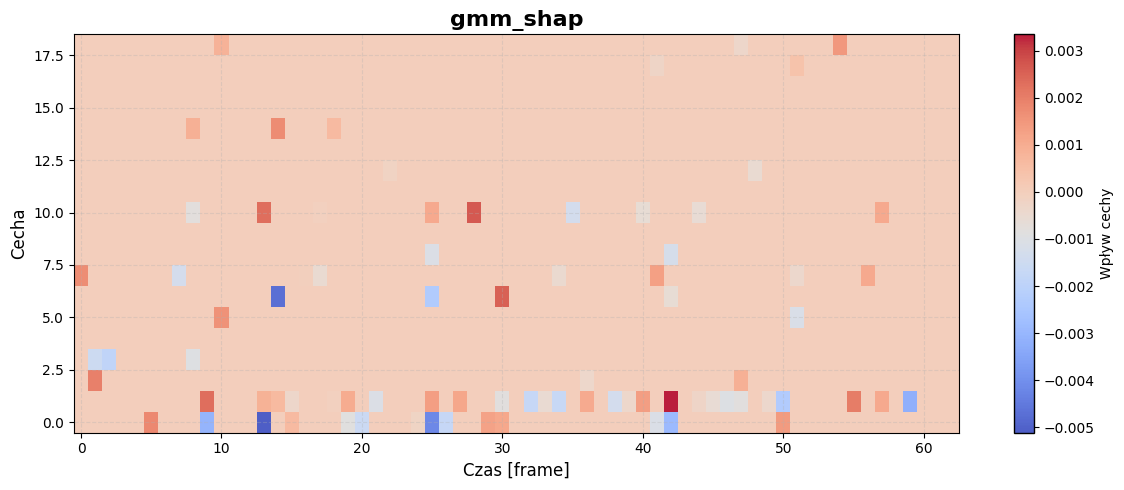

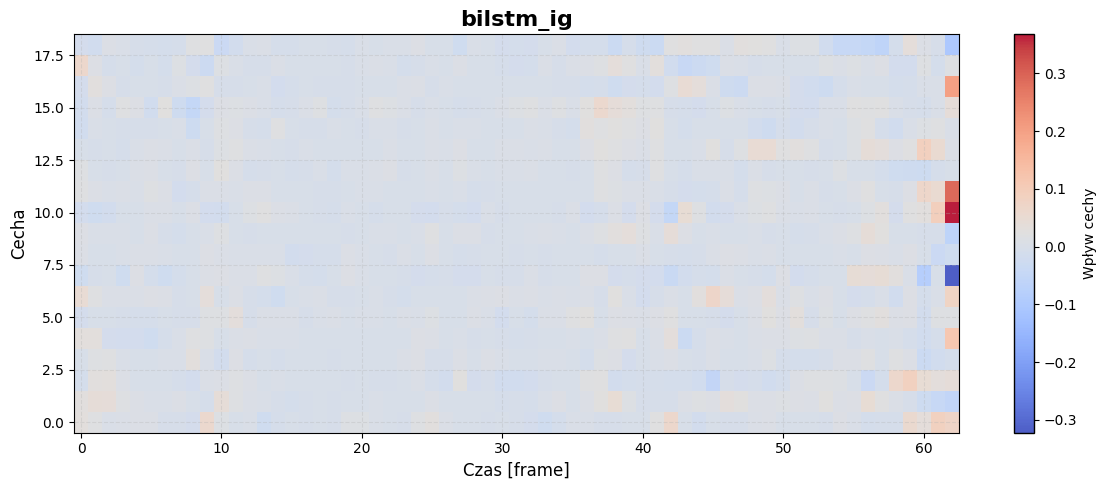

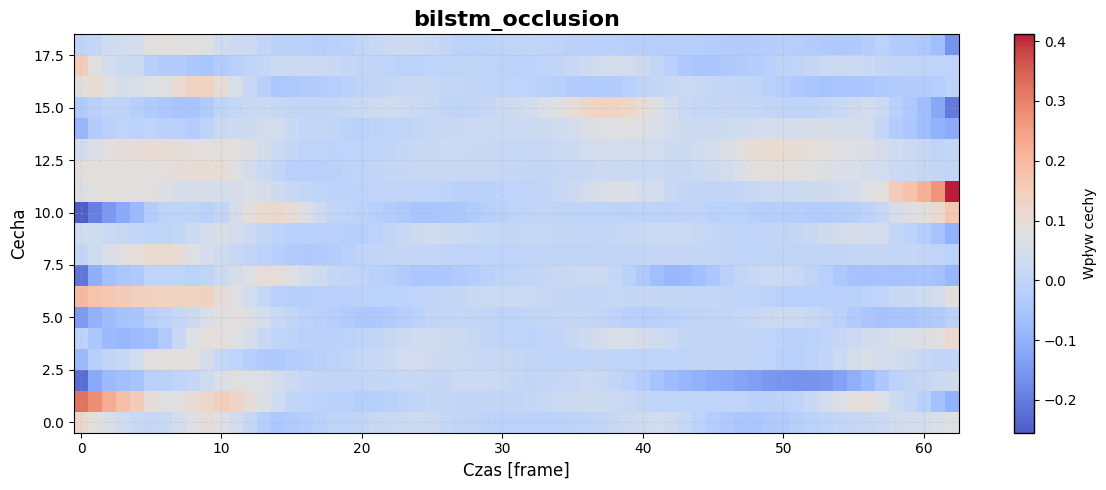

In [153]:
X_test = pd.read_csv("csvki/test_asv2016_data.csv")
X_test = extract_features(X_test, {'cqcc': extract_cqcc}, mean=False) 
X_test = X_test.dropna()
signal_original = X_test.loc[9, "cqcc"] 

heatmaps, top_results = compare_gmm_bilstm(
    instance_signal=signal_original,
    feature_col='cqcc',
    label_col='label',
    scaler_path=os.path.join("GMM-BiLSTM", "scaler.pkl"),
    model_dir="GMM-BiLSTM",
    transpose_func=transpose_cqcc,
    prepare_func=prepare_data_GMM_BiLSTM
)

plot_heatmaps_separately_stylish(heatmaps)

In [154]:
top_results

{'feature_importance': array([0.01186692, 0.01188854, 0.01320085, 0.00627451, 0.00892833,
        0.00824788, 0.01062247, 0.01555685, 0.00452453, 0.00719719,
        0.01666163, 0.01146582, 0.00570685, 0.01089081, 0.00733341,
        0.01167018, 0.01096997, 0.00953865, 0.015264  ], dtype=float32),
 'time_importance': array([2.1711187 , 1.6660738 , 1.4067771 , 1.2416202 , 1.1745656 ,
        1.0515016 , 0.9953321 , 1.0100648 , 1.1812009 , 1.2284949 ,
        1.0911906 , 0.98984337, 0.8165432 , 0.690284  , 0.64297336,
        0.49811402, 0.40364897, 0.32130796, 0.25762442, 0.21952467,
        0.20645276, 0.23837766, 0.29206875, 0.35649243, 0.3915783 ,
        0.36479688, 0.308719  , 0.30970693, 0.27209058, 0.23751886,
        0.22276944, 0.20342621, 0.1939898 , 0.23179032, 0.30263206,
        0.40305975, 0.5041108 , 0.5738251 , 0.6029863 , 0.595978  ,
        0.55874544, 0.5313532 , 0.5058816 , 0.43912828, 0.41199663,
        0.4435775 , 0.44505295, 0.4919907 , 0.582581  , 0.6324802 ,
  

In [146]:
top_intervals = extract_top_intervals_global(signal_original, heatmaps["bilstm_occlusion"])

top_intervals['strongest']

[{'feature': 'F1', 'start': 0.0, 'end': 0.48, 'strength': 0.13999058306217194},
 {'feature': 'F6', 'start': 0.0, 'end': 0.416, 'strength': 0.1328597217798233},
 {'feature': 'F11',
  'start': 1.536,
  'end': 2.016,
  'strength': 0.10890933871269226},
 {'feature': 'F10',
  'start': 0.352,
  'end': 0.576,
  'strength': 0.07977771013975143},
 {'feature': 'F12',
  'start': 0.0,
  'end': 0.448,
  'strength': 0.07943896949291229}]

In [148]:
top_intervals = extract_top_intervals_global(signal_original, heatmaps["bilstm_ig"])

top_intervals['strongest']


[{'feature': 'F10',
  'start': 1.792,
  'end': 2.016,
  'strength': 0.07650770246982574},
 {'feature': 'F13',
  'start': 1.76,
  'end': 1.984,
  'strength': 0.03731255605816841}]

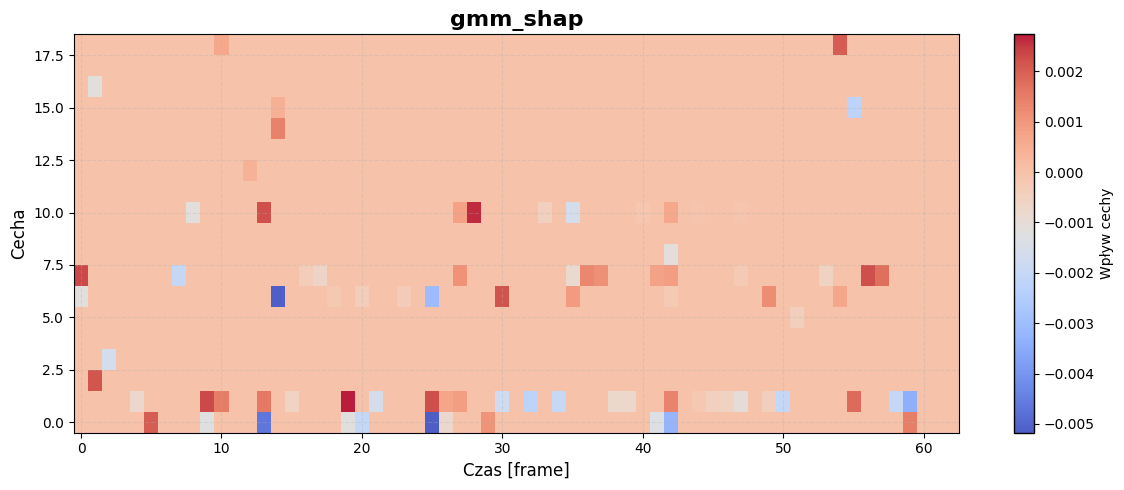

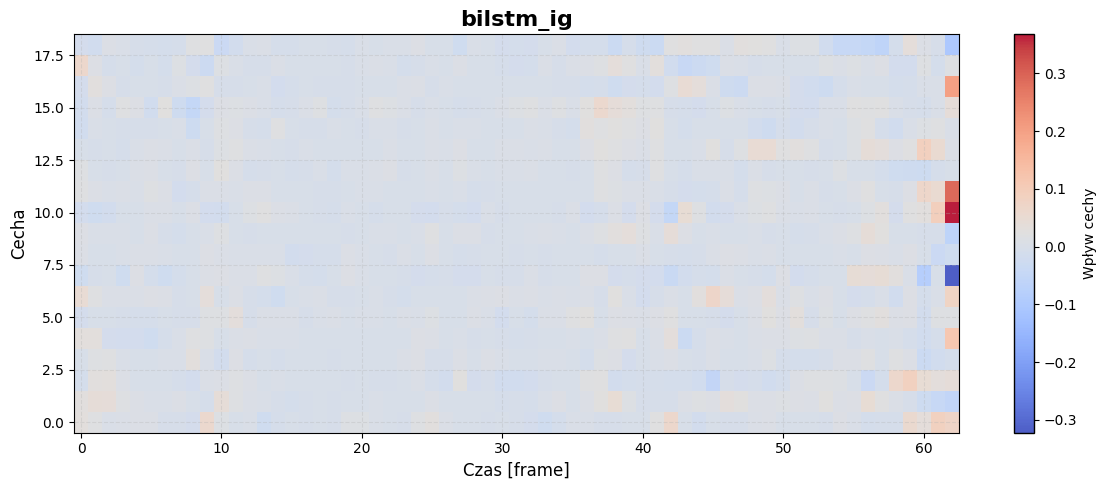

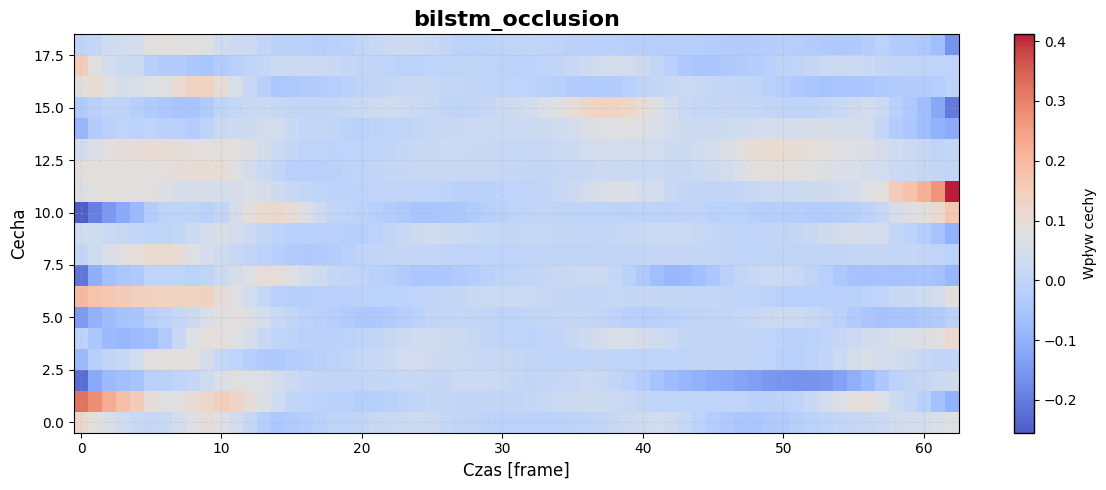

In [152]:
plot_heatmaps_separately_stylish(heatmaps)